**Загрузка необходимых библиотек**

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Чтение данных**

In [187]:
df = pd.read_csv('Job_Placement_Data.csv')
df.head(4)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed


In [188]:
data = df.copy()

**Предварительный анализ данных**

In [189]:
data[data.duplicated()]

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status


In [190]:
data.shape

(215, 13)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [192]:
data.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [193]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


**Визуализация**

**Построим гистограмму для каждых признаков**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fb3e1bb0>,
      dtype=object)

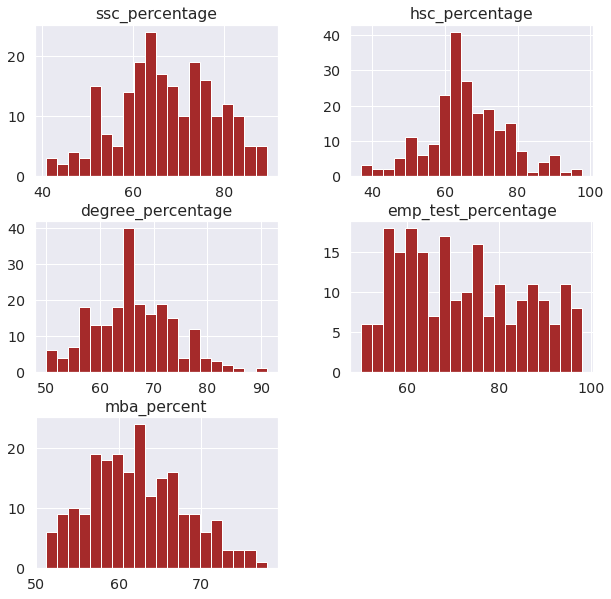

In [194]:
sns.set(style='darkgrid',font_scale=1.3)
data.hist(figsize=(10, 10), bins=20, color='brown')

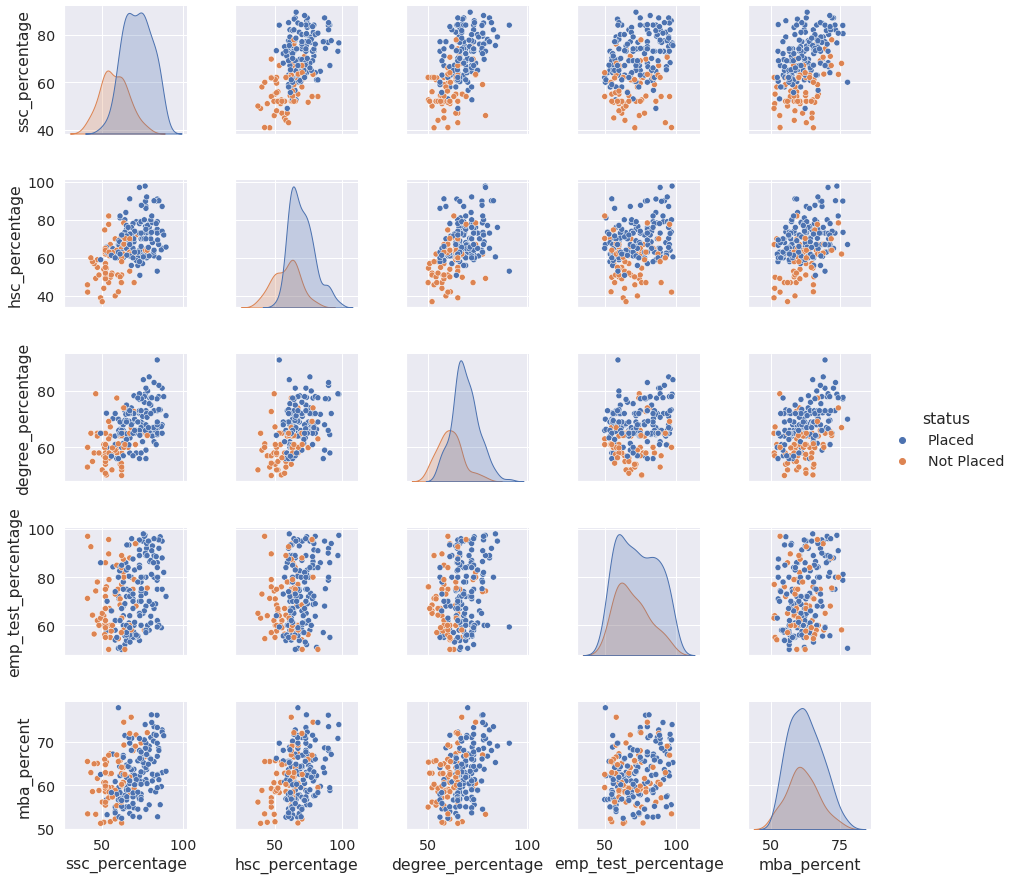

In [195]:
sns.pairplot(data, hue='status')

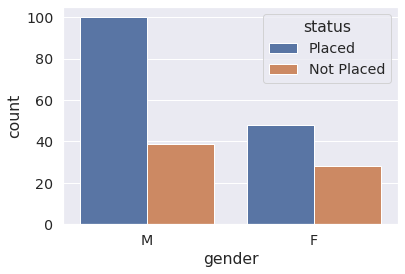

In [196]:
sns.countplot(data=data, x='gender', hue='status')

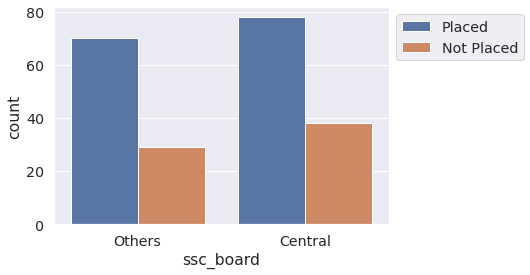

In [197]:
sns.countplot(data=data, x='ssc_board', hue='status')
plt.legend(bbox_to_anchor=(1,1))

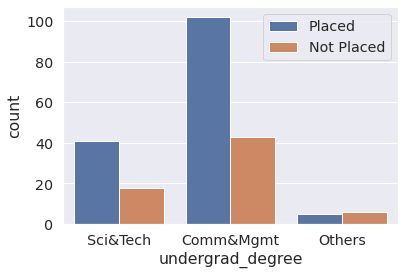

In [198]:
sns.countplot(data=data,x='undergrad_degree',hue='status')
plt.legend()

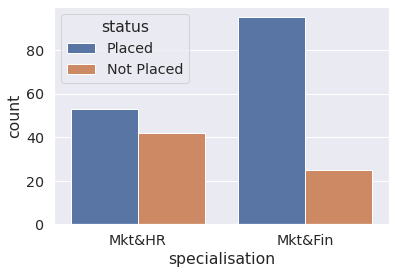

In [199]:
sns.countplot(data=data,x='specialisation',hue='status')

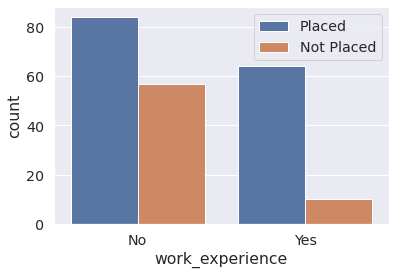

In [200]:
sns.countplot(data=data,x='work_experience',hue='status')
plt.legend(bbox_to_anchor=(1,1))

**Преобразуем номинальные признаки в порядковые**

In [201]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [202]:
gender = {'M':0,'F':1}
data['gender']=data['gender'].map(gender)

In [203]:
data['ssc_board'].value_counts()

Central    116
Others      99
Name: ssc_board, dtype: int64

In [204]:
ssc = {'Central':0,'Others':1}
data['ssc_board'] = data['ssc_board'].map(ssc)

In [205]:
data['hsc_board'].value_counts()

Others     131
Central     84
Name: hsc_board, dtype: int64

In [206]:
hsc = {'Central':0,'Others':1}
data['hsc_board'] = data['hsc_board'].map(hsc)

In [207]:
data['hsc_subject'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64

In [208]:
data['undergrad_degree'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

In [209]:
data['work_experience'].value_counts()

No     141
Yes     74
Name: work_experience, dtype: int64

In [210]:
work = {'Yes':1,'No':0}
data['work_experience']=data['work_experience'].map(work)

In [211]:
data['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [212]:
spec = {'Mkt&Fin':1,'Mkt&HR':0}
data['specialisation'] = data['specialisation'].map(spec)

In [213]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [214]:
status = {'Placed':1,'Not Placed':0}
data['status'] = data['status'].map(status)

In [215]:
data = pd.get_dummies(data=data, drop_first=True)
data.head(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
0,0,67.00,1,91.00,1,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,0,78.33,1,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,0,68.00,0,64.00,0,75.0,1,57.80,1,0,0,0,0
3,0,56.00,0,52.00,0,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,0,73.60,0,73.30,0,96.8,1,55.50,1,1,0,0,0


In [216]:
data.corr()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
gender,1.000000,0.068969,-0.019429,0.021334,-0.065945,0.173217,-0.085153,-0.084294,-0.106160,0.300531,-0.090670,0.001087,-0.042682,0.093246,-0.084072
ssc_percentage,0.068969,1.000000,0.116194,0.511472,0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.101323,0.189847,-0.066127,0.221235
ssc_board,-0.019429,0.116194,1.000000,-0.137013,0.605883,0.038070,-0.040744,-0.018991,0.051565,0.083120,0.037297,-0.056671,0.058505,-0.002758,0.101060
hsc_percentage,0.021334,0.511472,-0.137013,1.000000,-0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.258093,-0.226675,-0.131382,-0.053599
hsc_board,-0.065945,0.066996,0.605883,-0.019548,1.000000,0.067229,0.038357,0.039108,-0.002232,0.090201,0.016945,-0.073522,0.126446,-0.116920,0.086548
degree_percentage,0.173217,0.538404,0.038070,0.434206,0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.022724,0.092006,-0.180408,0.123477
work_experience,-0.085153,0.175675,-0.040744,0.141025,0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.056719,0.033270,0.009507,0.102962
emp_test_percentage,-0.084294,0.261993,-0.018991,0.245113,0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.021732,0.055352,0.006907,0.009748
specialisation,-0.106160,0.172536,0.051565,0.241630,-0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.129985,-0.166639,-0.090948,-0.061503
mba_percent,0.300531,0.388478,0.083120,0.354823,0.090201,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.049415,0.048050,-0.036055,0.125009


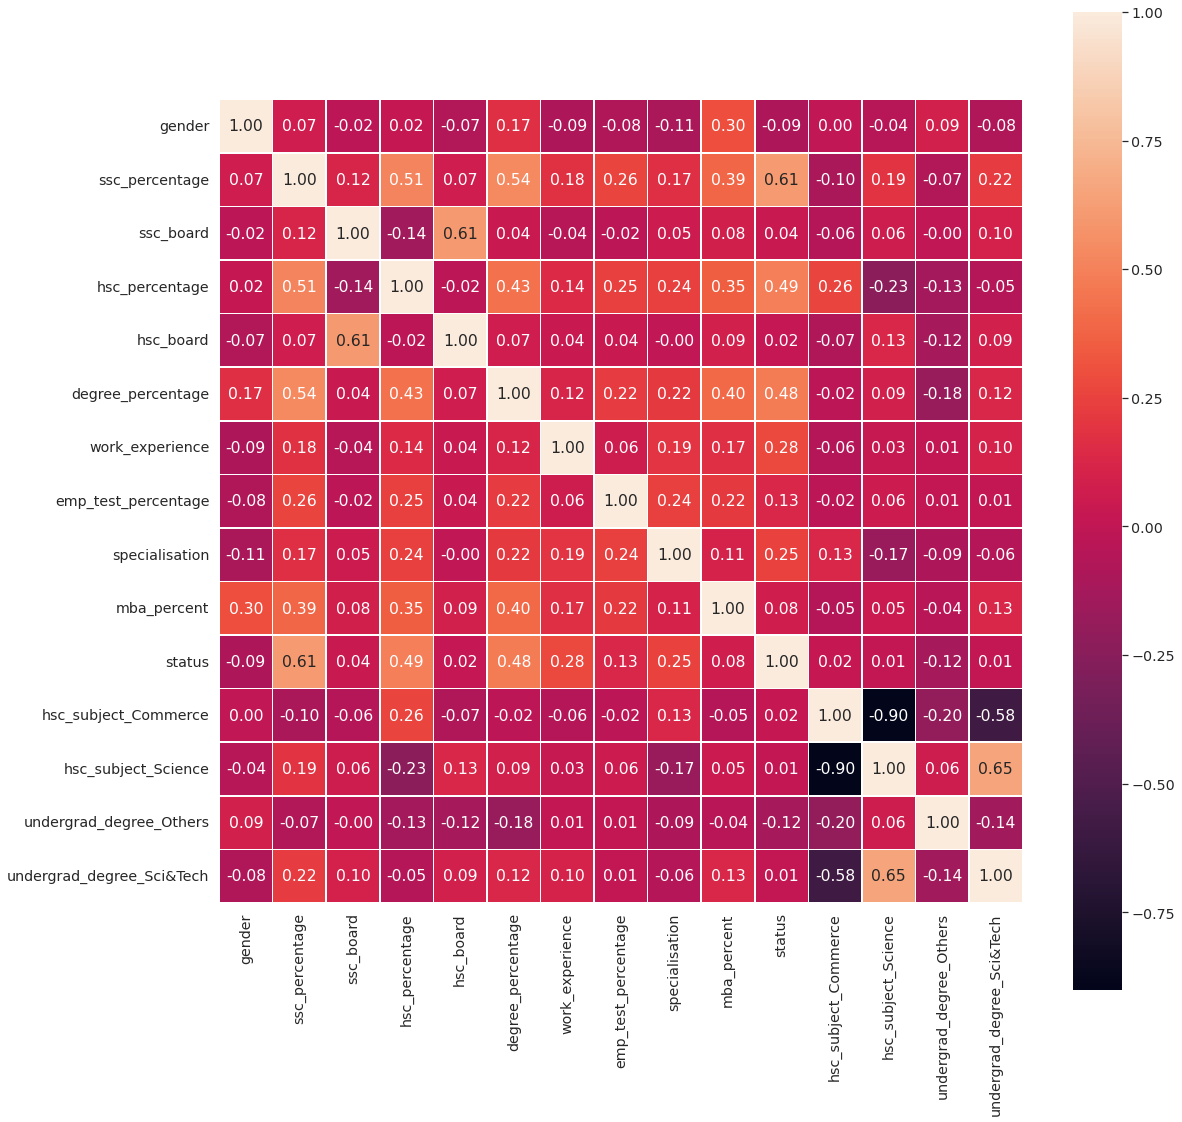

In [217]:
plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, cbar=True, square=True, linewidths=.5, fmt= '.2f')
plt.show()

**Выполним стандартизацию признаков**

In [218]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [219]:
pca = PCA(2, random_state=123)
data_pca = pca.fit_transform(data_scaled)

In [220]:
projection = pd.DataFrame(columns=['x', 'y'], data=data_pca)
projection

,x,y
0,-0.012377,-0.379413
1,-3.155766,1.592581
2,0.309426,-0.773919
3,2.892759,2.281347
4,-1.508965,-1.979396
...,...,...
210,-3.047172,-1.532374
211,-0.060007,2.127982
212,-1.248754,-1.193934
213,0.461592,-0.918491


**K-Means**

In [240]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(projection)
projection['cluster_pca'] = kmeans.predict(projection)

In [241]:
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

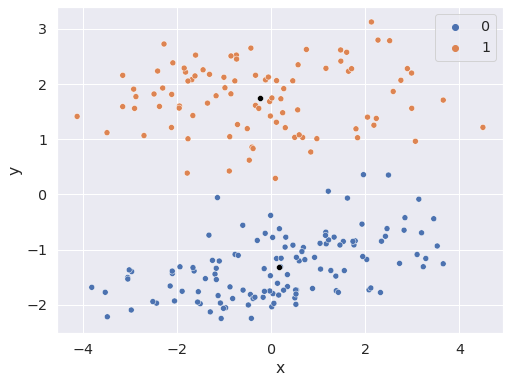

In [242]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=projection, x='x', y='y', hue='cluster_pca', palette="deep");
sns.scatterplot(x=centroids_x, y=centroids_y, marker='o', c=['black']);

**Разделим датасет на train и test**

In [224]:
features = data.columns.to_list()
features = set(features) - {'status'}

In [225]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data['status'], test_size=0.3, shuffle=True, random_state=42)

In [226]:
# X = data.drop(columns='status')
# y = data['status']
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

**KNN**

In [227]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test, predict_knn)
score_knn

0.8

In [228]:
conf_knn = confusion_matrix(y_test, predict_knn)
conf_knn

array([[ 9, 12],
       [ 1, 43]])

**Gaussian Naive Bayes**

In [229]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)
score_gnb = accuracy_score(y_test, predict_gnb)
score_gnb

0.7230769230769231

In [230]:
conf_gnb = confusion_matrix(y_test, predict_gnb)
conf_gnb

array([[ 8, 13],
       [ 5, 39]])

Как и ожидалось, метрика алгоритма KNN выше, чем в алгоритме наивного Байеса